For BERT, it is generally recommended to use the full, unaltered text because BERT is designed to understand the context and semantics of words within their original context. This includes punctuation and special characters, which can provide important context clues for BERT's attention mechanisms. Therefore, we will use the `full_text` column without lemmatization, stemming, or removal of stop words, punctuation, and special characters.

### Load the Data

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('transformed_data_v1.csv')

# Use the full_text column
text_column = 'full_text'

# Convert text to lowercase
df[text_column] = df[text_column].str.lower()


## Exploratory Data Analysis (EDA)

#### Text Length Distribution:

Text Length Distribution (in tokens):
count    13843.000000
mean       439.432276
std        180.636667
min        164.000000
25%        301.000000
50%        411.000000
75%        539.000000
max       1824.000000
Name: full_text, dtype: float64


C:\Users\dziya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


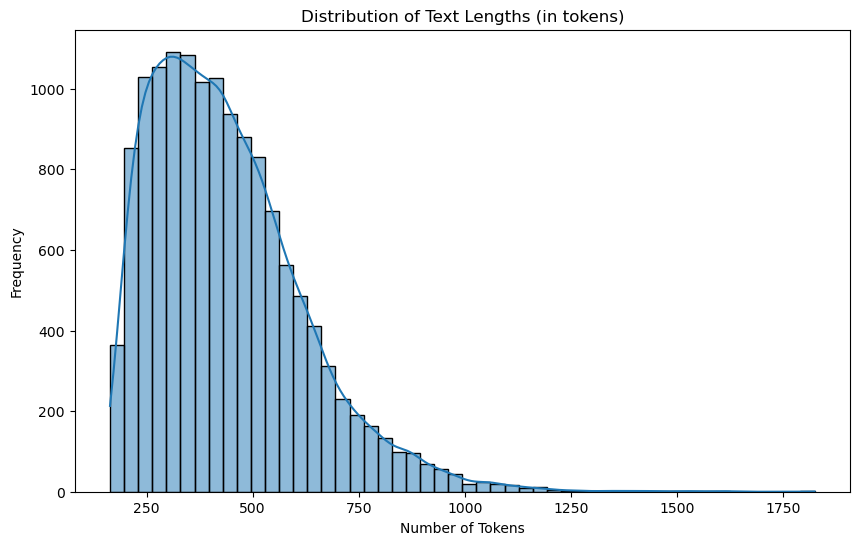

In [7]:
from transformers import BertTokenizer

# Choose the BERT model (uncased for this example)
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)

# Use the full_text column
text_column = 'full_text'

# Calculate text lengths in terms of tokens
text_lengths = df[text_column].apply(lambda x: len(tokenizer.tokenize(x)))

# Display summary statistics of text lengths
print("Text Length Distribution (in tokens):")
print(text_lengths.describe())

# Plot the distribution of text lengths
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(text_lengths, bins=50, kde=True)
plt.title('Distribution of Text Lengths (in tokens)')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()


C:\Users\dziya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


KeyError: '1'

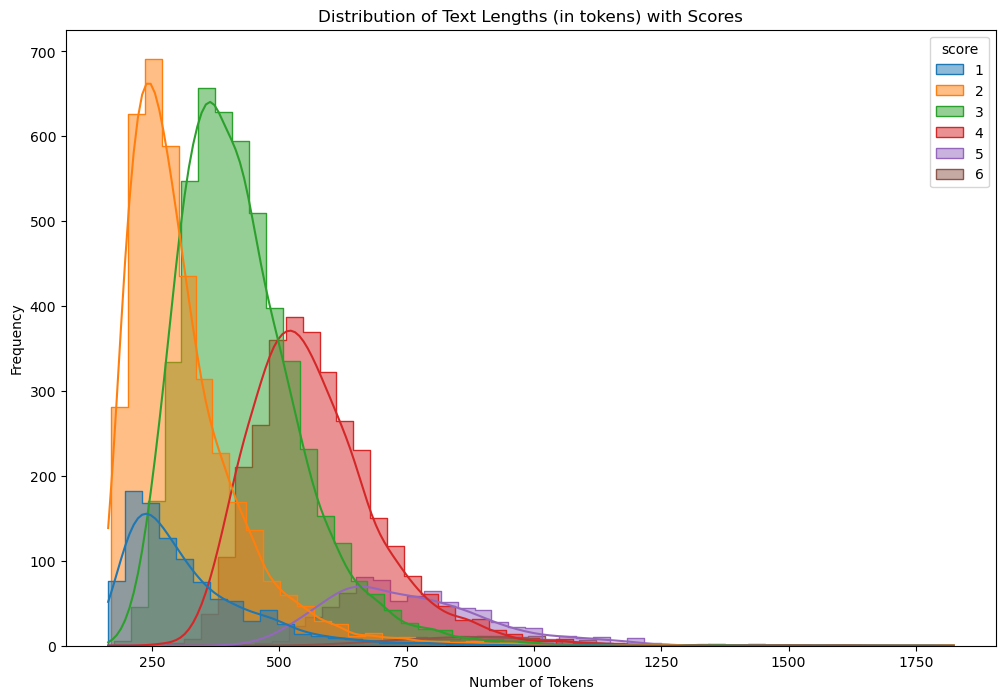

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the full_text column
text_column = 'full_text'
score_column = 'score'  # Replace with the actual column name for the score

# Calculate text lengths in terms of tokens
df['text_length_tokens'] = df[text_column].apply(lambda x: len(tokenizer.tokenize(x)))

# Define a distinct color palette
palette = sns.color_palette("tab10", df[score_column].nunique())

# Plot the distribution of text lengths with hue based on score
plt.figure(figsize=(12, 8))
hist_plot = sns.histplot(data=df, x='text_length_tokens', bins=50, kde=True, hue=score_column, palette=palette, multiple='dodge', element='step')
plt.title('Distribution of Text Lengths (in tokens) with Scores')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')

# Ensure custom legend is correctly set up
handles, labels = hist_plot.get_legend_handles_labels()
score_labels = sorted(df[score_column].unique())  # Keep as-is for matching data types

# Convert dictionary keys to strings to match score_labels
legend_dict = {str(unique): handle for unique, handle in zip(df[score_column].unique(), handles)}

handles = [legend_dict[str(label)] for label in score_labels]  # Convert label to string for matching
# Convert score_labels to strings for legend
score_labels = list(map(str, score_labels))

plt.legend(handles=handles, labels=score_labels, title='Score', loc='upper right')

# Save the plot
plt.savefig('text_length_distribution_with_scores.png')

# Show the plot
plt.show()


In [ ]:
# Use the full_text column
text_column = 'full_text'
score_column = 'score'  # Replace with the actual column name for the score

# Calculate text lengths in terms of tokens
df['text_length_tokens'] = df[text_column].apply(lambda x: len(tokenizer.tokenize(x)))

# Calculate descriptive statistics for each score
descriptive_stats = df.groupby(score_column)['text_length_tokens'].describe().reset_index()

# Display the descriptive statistics
print(descriptive_stats)

#### Check Maximum Token Length

In [ ]:
# Identify the maximum token length to ensure it fits within BERT's limit.
max_length = text_lengths.max()
print(f"Maximum token length: {max_length}")

# Check the percentage of texts within BERT's limit (512 tokens)
within_limit = (text_lengths <= 512).mean() * 100
print(f"Percentage of texts within BERT's token limit: {within_limit:.2f}%")


### Considerations for Using BERT

**Loss of Information**:
- Texts longer than 512 tokens (all with score=6 and majority with score=5) will lose the content beyond this limit, potentially leading to an incomplete representation of the text's quality and coherence, which are crucial for essay scoring.

**Alternative Approaches**:
- **Longer Context Models:** Consider using models designed for longer contexts, such as Longformer or BigBird, which can handle longer sequences without truncation.
- **Chunking:** Split longer texts into chunks of 512 tokens and aggregate their embeddings, although this might not fully capture the global context and coherence of the entire text.

However, let's try and see what BERT result will be and alternative approach will be for later